## 02. k-평균 군집 알고리즘
- `from sklearn.cluster import KMeans` : 클러스터 중심에 위치하는 평균값을 자동으로 찾아줌.
- 방법 :
  1) 무작위로 k개의 클러스터의 중심을 정함.
  2) 각 샘플에서 가장 가까운 클러스터의 중심을 찾아 클러스터 샘플로 지정
  3) 클러스터의 샘플의 평균값으로 클러스터 중심 변경 -> 클러스터 중심에 변화가 없을때까지 2)번 반복 

In [15]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)         #2차원으로 바꾸기  (샘플 개수 , 너비 * 높이)

fruits_2d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(300, 10000), dtype=uint8)

In [16]:
# k - 평균 군집 알고리즘

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)         #n_clusters = :클러스터를 몇개로 나눌 건지 지정
km.fit(fruits_2d)

KMeans(n_clusters=3)

In [17]:
# 군집된 결과는 labels_에 저장되어 있음. ==> 3개 군집으로 나눴으므로 배열의 값은 (0,1,2) 중 하나임. (아직 어떤 과일이 어떤 인덱스에 해당하는지 모름.)

km.labels_ 

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [20]:
# 0,1,2로 모은 샘플의 개수 확인

print(np.unique(km.labels_, return_counts = True))       

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [21]:
# 각 클러스터가 어떤 이미지를 나타내는지 그림으로 출력 

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
    n = len(arr)                     # n은 샘플 개수

    rows = int(np.ceil(n/10))        # 행이 1개이면 열의 개수는 샘플 개수 /  n을 10으로 나눠서 올림(ceil)

    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')

            axs[i,j].axis('off')    # 축 숨기기

plt.show()

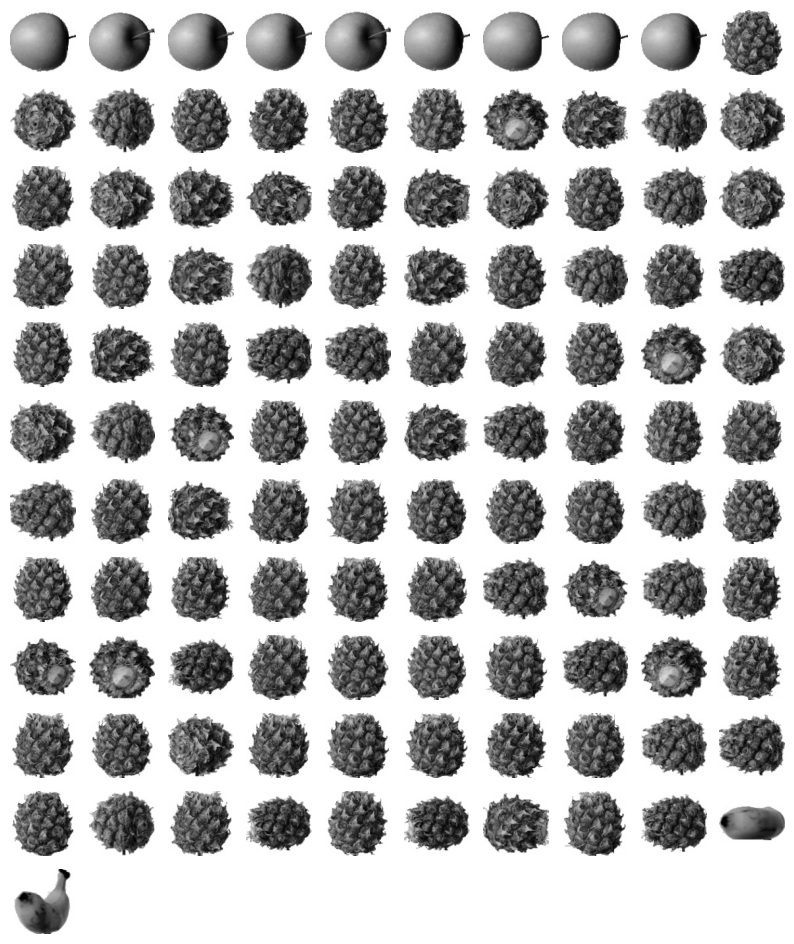

In [31]:
draw_fruits(fruits[km.labels_ == 2])

#### 클러스터 중심 관련 메소드
- transform() : 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 줌.
- predict() : 가장 가까운 클러스터 중심을 예측 클래스로 출력
- n_iter_ : 알고리즘이 반복한 횟수
- inertia : 최적의 k 찾기

In [32]:
# transform() : 클러스터 중심까지의 거리 확인 / 세번째 클러스터가 거리가 가장 짧음 . 레이블 2에 해당

print(km.transform(fruits_2d[200:201]))

[[10486.69058966  3713.63284791  9980.65660708]]


In [34]:
# predict() : 가장 가까운 클러스터인 레이블 2를 샘플의 예측값으로 활용

print(km.predict(fruits_2d[200:201]))

[1]


In [35]:
# n_iter_ : 알고리즘이 반복한 횟수

print(km.n_iter_)

5
